<a href="https://colab.research.google.com/github/paulorayner/plant-science-and-agriculture/blob/master/El_nino_occurrence_and_soybean_production.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Analysis of El niño occurrence, and effects on Brazilian agriculture**

Brazil is among the largest food exporters in the world, mainly grains, in particular Soybean. Therefore, loss of production triggers a damaging cascade starting with the farmers, which loses all the investment and the environment that receives agricultural inputs that will be waisted and accumulate in the soil. Due to reduced production, prices increase, consumers will pay a higher price for a lower amount of food.

Therefore, the use of tools that helps farmers take more assertive decisions is crucial for food security. Maybe one of the most important situations for crops is climate changing, especially El Niño and La Niña occurrence. This climate event influences the whole clime on earth. El niño is the Pacific South Ocean warming and La Niña is the opposite, the cooling. 

Thus, this analysis has as objective to evaluate how the Pacific South Ocean temperature changing, affect Brazilian Soy production.  

##Data acquisition

The time series dataset of El Niño and La Niña occurance can be acessed at [
NOAA/ National Weather Service - Climate Prediction Center](https://origin.cpc.ncep.noaa.gov/products/analysis_monitoring/ensostuff/ONI_v5.php) page. Soybean Brazilian production dataset is available at [Conselho Nacional de Abastecimento - CONAB](https://www.conab.gov.br/info-agro/safras/serie-historica-das-safras) web site. 

Both dataset were manipulated to adequate the layout as tabular, and upload on Github.

In [1]:
#Import the main libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
#Import the processed dataset from Github directory
df = pd.read_csv('https://github.com/paulorayner/plant-science-and-agriculture/raw/master/Soybean_project/historic_data_en_and_ln_index.csv', index_col='Year')

In [3]:
#Check the result
df.head()

,DJF,JFM,FMA,MAM,AMJ,MJJ,JJA,JAS,ASO,SON,OND,NDJ
Year,,,,,,,,,,,,
1950,-1.5,-1.3,-1.2,-1.2,-1.1,-0.9,-0.5,-0.4,-0.4,-0.4,-0.6,-0.8
1951,-0.8,-0.5,-0.2,0.2,0.4,0.6,0.7,0.9,1.0,1.2,1.0,0.8
1952,0.5,0.4,0.3,0.3,0.2,0.0,-0.1,0.0,0.2,0.1,0.0,0.1
1953,0.4,0.6,0.6,0.7,0.8,0.8,0.7,0.7,0.8,0.8,0.8,0.8
1954,0.8,0.5,0.0,-0.4,-0.5,-0.5,-0.6,-0.8,-0.9,-0.8,-0.7,-0.7


## Data Frame characteristics

This dataset brings the Ocean El Niño Index calculated by an increase or decrease in the South Pacific Ocean temperature. The data are available at [Climate Prediction Center from National Whether Service of National Oceanic and Atmospheric Administration](https://origin.cpc.ncep.noaa.gov/products/analysis_monitoring/ensostuff/ONI_v5.php) website. The data acquisition, processing and index calculation are explained in [Climate Prediction Center](https://origin.cpc.ncep.noaa.gov/products/analysis_monitoring/ensostuff/ONI_change.shtml) page.   

The raw dataset is organized similarly as the data are available at the Climate Prediction Center page. The column named 'Year' is set as an organizer column (called index for pandas library), tagging each row according to the Year of event occurrence. The other columns are named by three letters group. That letter is the three-month mean. 
**For example:**
>> **DJF** = **D**ecember, **J**anunary and **F**ebruary Oceanic Niño Index.

Therefore, the 12 columns reflect the monthly mean of the Ocean El Niño Index. By definition, warm periods (or index values above 0) are called El Niño and cold periods (index values bellow 0) are called La Niña. For more details and further references [accesses](https://www.climate.gov/news-features/understanding-climate/watching-el-ni%C3%B1o-and-la-ni%C3%B1a-noaa-adapts-global-warming).

###Data Layout Transformation
To reduce the complexity of Time Series analysis, some adjustments of the data frame are required. Note that the data are organized as an array, this layout is complex for our objective and demand complex coding to select or filter data. Thus, the data frame will be transformed to organize the data, in the first place, according to the Year and the monthly column (three letters that represents the three-month mean) in second place. Following the steps below:
* Build a new data frame using `pd.DataFrame()`
* Apply the `df.stack()`function to transform the data frame layout
* Name the new column as **Oni_index**

In [4]:
#Build the Dataframe oni (Oceanic Niño Index)
df_oni = pd.DataFrame(df.stack(), columns=['Oni_index'])

In [5]:
#Check the result
df_oni.head()

Oni_index
Year               
1950 DJF       -1.5
     JFM       -1.3
     FMA       -1.2
     MAM       -1.2
     AMJ       -1.1

###Create columns for data selection
Once the aim is to evaluate the El niño and La niña variation as Time Series. A column with **Year** and **Period** information will help select data according to the desired time interval. 
This process will follow the steps below:
* Create a copy of **df_oni**, using `copy()` function 
* reset the index to make the Year information available, using `reset_index` function. It is necessary for selec the data contained in the index dataframe.
* insert the columns called 'Year' and 'Period' on df_oni

In [6]:
#Create a copy and reset the index for select columns
df3 = df_oni.copy()
df3.reset_index(inplace=True) #reset_index(inplace=True) make it permanent

In [7]:
#Check the result
df3.head(2) #show only the 2 first rows

,Year,level_1,Oni_index
0,1950,DJF,-1.5
1,1950,JFM,-1.3


###Result
As we can see, the data frame copy presents three columns. The first one with Year information, the second one with period information (automatically tagged as **level_1**), the third is just a copy of the Oni_index column of the original data frame.

###Inserting the new columns
To insert the columns is necessary to use the parameter `df.values`. The df_oni data frame is a hierarchical index (or multindex), while the df3 is a simple index data frame. Thus is required to specify that only the values should be added to the main data frame **(df_oni)** respecting its index.

In [8]:
#Select the columns and add it in to the df_oni
df_oni['Year'] = df3['Year'].values #use the '.values' parameter because the dataframe present different indexes lenth
df_oni['Periods'] = df3['level_1'].values #The level_1 column has the period data

In [9]:
#Check the result
df_oni.head()

Oni_index  Year Periods
Year                             
1950 DJF       -1.5  1950     DJF
     JFM       -1.3  1950     JFM
     FMA       -1.2  1950     FMA
     MAM       -1.2  1950     MAM
     AMJ       -1.1  1950     AMJ

###Creating a the column with Year and Period information
This column is necessary and very useful for use it as **x** axis to build charts using **ax.plot** method and set the parameters.
This column is a union between **Year** and **Period** columns. It could be done just by creating a copy of df_oni index. However, it generates a list of tuples and some functions of matplotlib do not accept a list of tuples as **x** values (or at least is harder to work than a simple list). To solve this, the steps below create a useful column.

* Create a list named **list_a** with Year information and set it as a string (text).
* Create a list named **Periods** with period information.
* Create a list called list_c joining both lists.

Why set the Year column as a string? The column Year is an **int** (integer or number without decimal), and the period column is str (text). Thus, to simplify the process and put together both columns, the Year column was converted to a string.

In [10]:
list_a = df_oni['Year'].astype('str')
list_b = df_oni['Periods']
list_c = list_a + '_' + list_b

In [11]:
#Append the Year_period column to the main data frame
df_oni['Year_period'] = list_c

In [12]:
#Check the result
df_oni.head()

Oni_index  Year Periods Year_period
Year                                         
1950 DJF       -1.5  1950     DJF    1950_DJF
     JFM       -1.3  1950     JFM    1950_JFM
     FMA       -1.2  1950     FMA    1950_FMA
     MAM       -1.2  1950     MAM    1950_MAM
     AMJ       -1.1  1950     AMJ    1950_AMJ

##Final Data frame 
As we can see, now the main dataframe present all variables necessary for the analysis. 

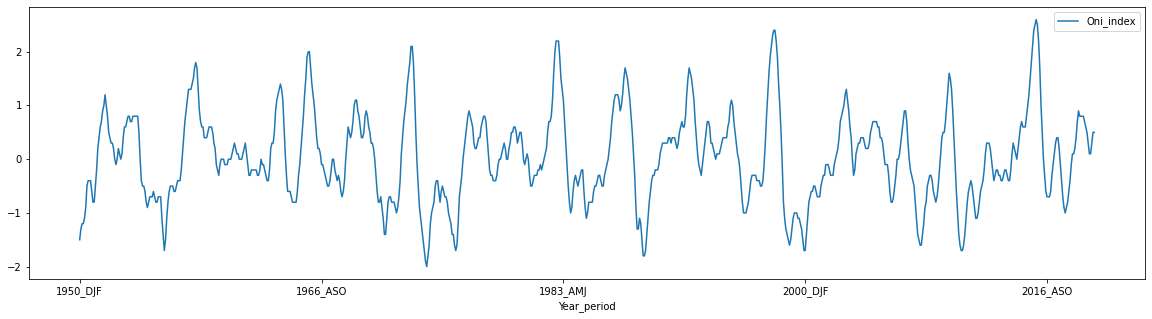

In [13]:
df_oni.plot(x='Year_period', y='Oni_index', figsize=(20,5));

#Data Analysis 
The abnormalities occurrence are classified as neutral, weak, moderate and strong, according to [INPE/CPTEC](http://enos.cptec.inpe.br/) and [Trenberth (1997)](https://journals.ametsoc.org/bams/article/78/12/2771/55777/The-Definition-of-El-Nino). 

For El Niño, when:
* Values are higher than 0 and lower than 0.5 is considered neutral event
* Values are equal or higher 0.5 and lower than 1.0 is considered weak event 
* Values are equal or higher 1.0 and lower than 1.5 is considered moderate event 
* Values are equal or higher 1.5 is considered strong event

>

The same logic is applied to La Niña Values.

When:
* Values are lower than 0 and higher than -0.5 is considered neutral event
* Values are equal or lower -0.5 and higher than -1.0 is considered weak event 
* Values are equal or lower -1.0 and higher than -1.5 is considered moderate event 
* Values are equal or lower to -1.5 is considered strong event

##Data visualization



 

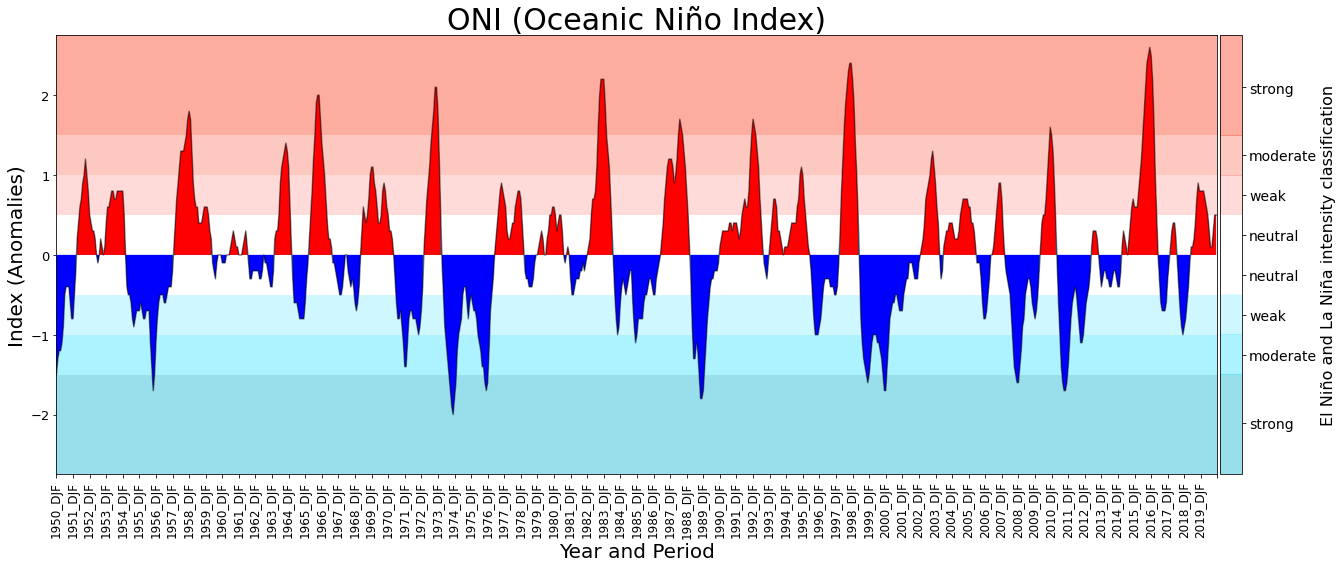

In [14]:
import matplotlib as mpl
from matplotlib import cm
import matplotlib.ticker as plticker

x = df_oni['Year_period']
y = df_oni['Oni_index']
loc = plticker.MultipleLocator(base=12)

#Create a list with the colorbar colors
list_colors = ['#02B0CF', '#32E0FF', '#89EDFF','#FFFFFF',
         '#FFFFFF', '#FDA7A0', '#FB765F','#F83310']

#Create the tags of colorbar
tags = ['strong', 'moderate', 'weak','neutral', 
        'neutral','weak', 'moderate', 'strong']

#Create the colorbar ticks 
cbarticks = [2.1, 1.25, 0.75, 0.25, -0.25, -0.75, -1.25, -2.1]

#Create a map of colors based on cores variable
cmap = mpl.colors.ListedColormap(list_colors)
bounds = [-2.75, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2.75]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)


fig, (ax1) = plt.subplots(figsize=(20,8))

ax1.plot(x, y, color='black', alpha=0.5)
#Fill between function fill the chart area
ax1.fill_between(x, 0, y)
ax1.fill_between(x, y, where= y >= 0, facecolor='red', zorder=2) #Fill with red El Niño values
ax1.fill_between(x, y, where= y <= 0, facecolor='blue', zorder=2) #Fill eith blue La niña value
ax1.xaxis.set_major_locator(loc)
ax1.set_xlim(xmin=0, xmax=840)
plt.xticks(rotation=90, size=12)
plt.yticks(size=13)
ax1.set_ylim(ymin=-2.75, ymax=2.75)

#Insert a rectanggle with each color set in cores variable
ax1.axhspan(1.5,2.75, facecolor='#F83310', alpha=0.4)
ax1.axhspan(1, 1.5, facecolor='#FB765F', alpha=0.4)
ax1.axhspan(0.5, 1, facecolor='#FDA7A0', alpha=0.4)
ax1.axhspan(0, 0, facecolor='#FFFFFF', alpha=0.4)
ax1.axhspan(-0.5, -1, facecolor='#89EDFF', alpha=0.4)
ax1.axhspan(-1, -1.5, facecolor='#32E0FF', alpha=0.4)
ax1.axhspan(-1.5,-2.75, facecolor='#02B0CF', alpha=0.4)
ax1.set_xlabel('Year and Period', size=20)
ax1.set_ylabel('Index (Anomalies)', size=20)
ax1.set_title('ONI (Oceanic Niño Index)', size=30)

#Insert the colorbar to the chart
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
                    alpha=0.4,
                    orientation='vertical',
                    ticks=cbarticks,
                    boundaries=bounds,
                    spacing='proportional',
                    pad=0.002 )
cbar.ax.set_yticklabels(tags, fontsize=14)

cbar.ax.set_ylabel('El Niño and La Niña intensity classification', fontsize=16);


plt.tight_layout()
#fig.savefig('figure1.jpeg', dpi=300) to save the figure delete the # and execute the code

#Soybean production analysis
To evaluate the impact of El Niño and La Niña on Soybean production, two datasets provided by [CONAB](https://www.conab.gov.br/info-agro/safras/serie-historica-das-safras) are used. Both datasets are located in the same file on CONAB website. The fisrt one is the **soy_production** and the other one the **soy_yield** both brigs literally the information of its names.

In [15]:
#Import the soybean production
soy_production_dataset = 'https://github.com/paulorayner/plant-science-and-agriculture/raw/master/Soybean_project/conab_dataset_soybean_production.csv'

#Import the soybean yield
soy_yield_dataset= 'https://github.com/paulorayner/plant-science-and-agriculture/raw/master/Soybean_project/conad_dataset_soybean_yield.csv'

In [16]:
df_soy_production = pd.read_csv(soy_production_dataset, sep=';') #the dataset is seperated by ';', thus is necessary to set it.
df_soy_yield = pd.read_csv(soy_yield_dataset,sep=';')

##Data Description 

Both datasets preset the same table layout. The CONAB provides the data as a `.xlsx` file organized in tabs. They were separated in different files and named according to the information they present and uploaded to Gitbub. 

The dataset named **soy_production** brings the information about Brazilian Soybean production expressed as **thousand tons**.

The second dataset named **soy_yield** presents the information about Yield Average, the values are expressed as **kilograms per hectare (Kg/ha)**.

Both datasets have the first column named as **REGIAO/UF**. This column brings information summarized by region (REGIAO), and each stated separately and the Federal District. 

Brazil is divided into five regions 
 * Norte = North
 * Nordeste = Northeast
 * Centro-Oeste = Midwest
 * Sudeste = Southeast
 * Sul = South. 


The other columns brings the data for each each harvest cycle. 
 * Example: he column **1976/77** presents data about the harvest cycle that initiated in 1976 and ended in 1977. 

In [17]:
#Check the result 
df_soy_production.head()

,REGIAO/UF,1976/77,1977/78,1978/79,1979/80,1980/81,1981/82,1982/83,1983/84,1984/85,1985/86,1986/87,1987/88,1988/89,1989/90,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,1998/99,1999/00,2000/01,2001/02,2002/03,2003/04,2004/05,2005/06,2006/07,2007/08,2008/09,2009/10,2010/11,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20
0,NORTE,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.1,54.7,135.6,53.2,11.5,19.4,36.4,59.0,45.5,14.2,28.6,99.8,123.2,150.7,216.6,369.0,557.5,913.7,1419.9,1255.2,1079.9,1472.4,1414.0,1691.7,1977.2,2172.2,2661.5,3391.3,4289.5,3818.9,5536.4,5903.9,5924.8,6612.3
1,RR,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.8,0.0,4.9,0.0,0.0,0.0,0.0,0.0,8.4,7.2,28.8,56.0,28.0,15.4,48.8,22.4,3.9,10.4,10.4,33.6,56.2,63.9,79.2,90.0,117.5,108,149.2
2,RO,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.1,7.7,31.2,15.6,5.0,0.2,10.8,0.0,13.0,0.0,8.9,14.1,26.1,35.4,76.5,89.2,123.0,177.9,227.2,283.0,277.5,311.6,326.5,384.3,425.3,462.2,539.3,607.7,732.9,765.0,930.3,1094.9,1109.2,1172.4
3,AC,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5,4.4,11.8
4,AM,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.6,5.4,5.4,8.4,5.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.4,5.3,5.3


In [18]:
#Check the result
df_soy_yield.head()

,REGIAO/UF,1976/77,1977/78,1978/79,1979/80,1980/81,1981/82,1982/83,1983/84,1984/85,1985/86,1986/87,1987/88,1988/89,1989/90,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,1998/99,1999/00,2000/01,2001/02,2002/03,2003/04,2004/05,2005/06,2006/07,2007/08,2008/09,2009/10,2010/11,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20
0,NORTE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1250.0,1833.33,1693.5,1817.69,1266.67,1825,1603,1820,2056,2126,2119,1135,2105.0,2444,2524,2362,2615,2659,2593,2721,2473,2630.18,2845,2841,2943,3063,3027,2952.39,2876.69,2976.37,2422.7,3060.53,3056.02,2980,3163
1,RR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,2800,0,2700,0,0.0,0,0,0,2400,2400,2400,2800,2800,2800.00,3250,2800,2800,2800,2800,2800.00,3120.00,2685.00,3300.0,3000.00,3077.00,2700,3044
2,RO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1250.0,1833.33,1790.7,2000.00,2000.00,2100,2400,2400,0,2700,0,2700,3000.0,3000,3000,3060,3120,3000,2990,3054,2660,3070.00,3122,3080,3142,3215,3221,3216.00,3180.00,3166.00,3028.4,3143.00,3282.00,3324,3365
3,AC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0.00,0,0,0,0,0,0.00,0.00,0.00,0.0,0.00,2938.00,2940,2939
4,AM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0.0,0,0,0,1454,2571,2571,3000,3000,0.00,0,0,0,0,0,0.00,0.00,0.00,0.0,0.00,2250.00,2400,2300


##Data Frames Transformation
To simplify the data selection, the columns will be set as rows, and rows will be transformed into columns. Following the steps below

* Transpose the data frame, this step is executed using the function `transpose()`. This step is executed for both data frames.
* Reset the index using `reset.index()`, to make all columns available to modifications.

In [19]:
#Transpose the data frame and reset the index
df_sp = pd.DataFrame(df_soy_production.transpose())
df_sp.reset_index(inplace=True) # inplace=True to implement the modification permanently
df_sy = pd.DataFrame(df_soy_yield.transpose())
df_sy.reset_index(inplace=True)

###Result 
Note the names of the columns were set as numbers, and the real names of the columns are at the first line. This situation can be fixed following the steps below. 

* Select the first row using the method `loc` and attribute them into a variable, here named header. 

* Select all data set, except the first row.

* Attribute the header as the name for every column of the data frame using `df.column`= header.

* Rename the column **REGIAO/UF** as **Harvest_cycle**. 

In [20]:
df_sp.head()

,index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
0,REGIAO/UF,NORTE,RR,RO,AC,AM,AP,PA,TO,NORDESTE,MA,PI,CE,RN,PB,PE,AL,SE,BA,CENTRO-OESTE,MT,MS,GO,DF,SUDESTE,MG,ES,RJ,SP,SUL,PR,SC,RS,NORTE/NORDESTE,CENTRO-SUL,BRASIL
1,1976/77,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,540,450,0,90,0,875,95,0,0,780,10730,4600,480,5650,0,12145,12145
2,1977/78,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,578,8,472,98,0,882,137,0,0,745,8266,3150,440,4676,0,9726,9726
3,1978/79,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1100,26,849,225,0,1020,170,0,0,850,8080,4050,430,3600,0,10200,10200
4,1979/80,0,0,0,0,0,0,0,0,2.2,0,0,0,0,0,0,0,0,2.2,1850.4,116.9,1267.2,449.5,16.8,1305,255,0,0,1050,11729.8,5420,728,5581.8,2.2,14885.2,14887.4


In [21]:
df_sy.head()

,index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
0,REGIAO/UF,NORTE,RR,RO,AC,AM,AP,PA,TO,NORDESTE,MA,PI,CE,RN,PB,PE,AL,SE,BA,CENTRO-OESTE,MT,MS,GO,DF,SUDESTE,MG,ES,RJ,SP,SUL,PR,SC,RS,NORTE/NORDESTE,CENTRO-SUL,BRASIL
1,1976/77,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1428.57,1451.61,0,1323.53,0,1650.94,1117.65,0,0,1752.81,1776.2,2090.91,1367.52,1618.91,0,1747.73,1747.73
2,1977/78,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,968.17,1333.33,955.47,1010.31,0,1314.46,1223.21,0,0,1332.74,1269.35,1341,1075.79,1245.6,0,1250.13,1250.13
3,1978/79,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1527.78,1368.42,1481.68,1757.81,0,1566.82,1650.49,0,0,1551.09,1191.74,1723.4,895.83,911.39,0,1251.38,1251.38
4,1979/80,0,0,0,0,0,0,0,0,1157.89,0,0,0,0,0,0,0,0,1157.89,1656.58,1670,1600,1819.84,2100,1838.03,1700,0,0,1875,1693.34,2239.67,1400,1400,1157.89,1700.39,1700.27


In [22]:
#Rename the columns
header = df_sp.iloc[0] #Select the first row and set as header
df_sp = df_sp[1:] # Select all data frame except the first row
df_sp.columns = header #Atribute the variable header as name for every column
df_sp.rename(columns={"REGIAO/UF": "Harvest_cycle"}, inplace=True) # Rename the column because
; 

''

In [23]:
#Rename the columns 
header = df_sy.iloc[0]
df_sy = df_sy[1:]
df_sy.columns = header
df_sy.rename(columns={"REGIAO/UF": "Harvest_cycle"}, inplace=True);

In [24]:
#Check the result
df_sp.head(5)

,Harvest_cycle,NORTE,RR,RO,AC,AM,AP,PA,TO,NORDESTE,MA,PI,CE,RN,PB,PE,AL,SE,BA,CENTRO-OESTE,MT,MS,GO,DF,SUDESTE,MG,ES,RJ,SP,SUL,PR,SC,RS,NORTE/NORDESTE,CENTRO-SUL,BRASIL
1,1976/77,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,540,450,0,90,0,875,95,0,0,780,10730,4600,480,5650,0,12145,12145
2,1977/78,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,578,8,472,98,0,882,137,0,0,745,8266,3150,440,4676,0,9726,9726
3,1978/79,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1100,26,849,225,0,1020,170,0,0,850,8080,4050,430,3600,0,10200,10200
4,1979/80,0,0,0,0,0,0,0,0,2.2,0,0,0,0,0,0,0,0,2.2,1850.4,116.9,1267.2,449.5,16.8,1305,255,0,0,1050,11729.8,5420,728,5581.8,2.2,14885.2,14887.4
5,1980/81,0,0,0,0,0,0,0,0,3.8,0,0,0,0,0,0,0,0,3.8,2097,230,1413,429,25,1317,285,0,0,1032,12067,5240,688,6139,3.8,15481,15484.8


In [25]:
#Check the result
df_sy.head(5)

,Harvest_cycle,NORTE,RR,RO,AC,AM,AP,PA,TO,NORDESTE,MA,PI,CE,RN,PB,PE,AL,SE,BA,CENTRO-OESTE,MT,MS,GO,DF,SUDESTE,MG,ES,RJ,SP,SUL,PR,SC,RS,NORTE/NORDESTE,CENTRO-SUL,BRASIL
1,1976/77,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1428.57,1451.61,0,1323.53,0,1650.94,1117.65,0,0,1752.81,1776.2,2090.91,1367.52,1618.91,0,1747.73,1747.73
2,1977/78,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,968.17,1333.33,955.47,1010.31,0,1314.46,1223.21,0,0,1332.74,1269.35,1341,1075.79,1245.6,0,1250.13,1250.13
3,1978/79,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1527.78,1368.42,1481.68,1757.81,0,1566.82,1650.49,0,0,1551.09,1191.74,1723.4,895.83,911.39,0,1251.38,1251.38
4,1979/80,0,0,0,0,0,0,0,0,1157.89,0,0,0,0,0,0,0,0,1157.89,1656.58,1670,1600,1819.84,2100,1838.03,1700,0,0,1875,1693.34,2239.67,1400,1400,1157.89,1700.39,1700.27
5,1980/81,0,0,0,0,0,0,0,0,1583.33,0,0,0,0,0,0,0,0,1583.33,1678.94,1796.88,1740.15,1459.18,1666.67,1796.73,1500,0,0,1900.55,1798.63,2229.79,1349.02,1594.96,1583.33,1781.27,1781.21


##Data Frame Adjustments
The **" / "** symbol might cause some troubles depending on the method used to plot the data. Therefore, the **" / "** is replaced by **"_"** and any space will be also removed, for both using the method `replace()` and the `for` looping.

In [26]:
#Replace the symbols 
df_sp.Harvest_cycle = ([x.replace('/', '_') for x in df_sp.Harvest_cycle]) #Replace the / with _
df_sp.Harvest_cycle = ([x.replace(' ', '') for x in df_sp.Harvest_cycle]) # Remove any space

In [27]:
df_sy.Harvest_cycle = ([x.replace('/', '_') for x in df_sy.Harvest_cycle])
df_sy.Harvest_cycle = ([x.replace(' ', '') for x in df_sy.Harvest_cycle])

In [28]:
#Check the result
df_sp.head(3)

,Harvest_cycle,NORTE,RR,RO,AC,AM,AP,PA,TO,NORDESTE,MA,PI,CE,RN,PB,PE,AL,SE,BA,CENTRO-OESTE,MT,MS,GO,DF,SUDESTE,MG,ES,RJ,SP,SUL,PR,SC,RS,NORTE/NORDESTE,CENTRO-SUL,BRASIL
1,1976_77,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,540,450,0,90,0,875,95,0,0,780,10730,4600,480,5650,0,12145,12145
2,1977_78,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,578,8,472,98,0,882,137,0,0,745,8266,3150,440,4676,0,9726,9726
3,1978_79,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1100,26,849,225,0,1020,170,0,0,850,8080,4050,430,3600,0,10200,10200


In [29]:
df_sy.head(3)

,Harvest_cycle,NORTE,RR,RO,AC,AM,AP,PA,TO,NORDESTE,MA,PI,CE,RN,PB,PE,AL,SE,BA,CENTRO-OESTE,MT,MS,GO,DF,SUDESTE,MG,ES,RJ,SP,SUL,PR,SC,RS,NORTE/NORDESTE,CENTRO-SUL,BRASIL
1,1976_77,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1428.57,1451.61,0,1323.53,0,1650.94,1117.65,0,0,1752.81,1776.2,2090.91,1367.52,1618.91,0,1747.73,1747.73
2,1977_78,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,968.17,1333.33,955.47,1010.31,0,1314.46,1223.21,0,0,1332.74,1269.35,1341,1075.79,1245.6,0,1250.13,1250.13
3,1978_79,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1527.78,1368.42,1481.68,1757.81,0,1566.82,1650.49,0,0,1551.09,1191.74,1723.4,895.83,911.39,0,1251.38,1251.38


##Data Characteristics 
o proceed with the analysis is necessary to check the data types. It can be checked using the method `dtypes`.

In [30]:
df_sp.dtypes

0
Harvest_cycle     object
NORTE             object
RR                object
RO                object
AC                object
AM                object
AP                object
PA                object
TO                object
NORDESTE          object
MA                object
PI                object
CE                object
RN                object
PB                object
PE                object
AL                object
SE                object
BA                object
CENTRO-OESTE      object
MT                object
MS                object
GO                object
DF                object
SUDESTE           object
MG                object
ES                object
RJ                object
SP                object
SUL               object
PR                object
SC                object
RS                object
NORTE/NORDESTE    object
CENTRO-SUL        object
BRASIL            object
dtype: object

In [31]:
df_sy.dtypes

0
Harvest_cycle     object
NORTE             object
RR                object
RO                object
AC                object
AM                object
AP                object
PA                object
TO                object
NORDESTE          object
MA                object
PI                object
CE                object
RN                object
PB                object
PE                object
AL                object
SE                object
BA                object
CENTRO-OESTE      object
MT                object
MS                object
GO                object
DF                object
SUDESTE           object
MG                object
ES                object
RJ                object
SP                object
SUL               object
PR                object
SC                object
RS                object
NORTE/NORDESTE    object
CENTRO-SUL        object
BRASIL            object
dtype: object

###Result 
As we can see, all data are reconized as object. However they are a **float** (number with decimal). Thus, the method `pd.to_numeric` will be used to convert all numbers reconized as object to float. 

In [32]:
col_list =((df_sp.iloc[:, 1:]).columns)  # Create a list of columns to change.
for i in col_list:
	df_sp[i] = pd.to_numeric(df_sp[i], errors='ignore') #errors=ignore will ignore text columns.

In [33]:
col_list =((df_sy.iloc[:, 1:]).columns)
for i in col_list:
	df_sy[i] = pd.to_numeric(df_sy[i], errors='ignore')

In [34]:
#Check the result
df_sp.dtypes

0
Harvest_cycle      object
NORTE             float64
RR                float64
RO                float64
AC                float64
AM                float64
AP                float64
PA                float64
TO                float64
NORDESTE          float64
MA                float64
PI                float64
CE                 object
RN                 object
PB                 object
PE                 object
AL                float64
SE                 object
BA                float64
CENTRO-OESTE      float64
MT                float64
MS                float64
GO                float64
DF                float64
SUDESTE           float64
MG                float64
ES                 object
RJ                 object
SP                float64
SUL               float64
PR                float64
SC                float64
RS                float64
NORTE/NORDESTE    float64
CENTRO-SUL        float64
BRASIL            float64
dtype: object

In [35]:
#Check the result
df_sy.dtypes

0
Harvest_cycle      object
NORTE             float64
RR                float64
RO                float64
AC                float64
AM                float64
AP                float64
PA                float64
TO                float64
NORDESTE          float64
MA                float64
PI                float64
CE                 object
RN                 object
PB                 object
PE                 object
AL                float64
SE                 object
BA                float64
CENTRO-OESTE      float64
MT                float64
MS                float64
GO                float64
DF                float64
SUDESTE           float64
MG                float64
ES                 object
RJ                 object
SP                float64
SUL               float64
PR                float64
SC                float64
RS                float64
NORTE/NORDESTE    float64
CENTRO-SUL        float64
BRASIL            float64
dtype: object

#Data undestanding
After executing all modifications, the data frame is ready to proceed to the Data Analysis.

As mentioned above, Brazil present five major regions and each one are composed by the states. The list below is organized by region and each state the belong to it, following the same order of the Data Frame. 

* NORTE (North) 
>* RR = Roraima
>* RO = Rondônia
>* AC = Acre
>* AM = Amazonas
>* AP = Amapá
>* PA = Pará
>* TO = Tocantins

* NORDESTE (Northeart)
>* MA = Maranhão
>* PI = Piauí
>* CE = Ceará
>* RN = Rio Grande do Norte
>* PB = Paraíba
>* PE = Pernanbuco
>* AL = Alagoas
>* SE = Sergipe
>* BA = Bahía 

* CENTRO-OESTE (Midwest)
>* MT = Mato Grosso
>* MS = Mato Grosso do Sul
>* GO = Goiás
>* DF = Distrito Federal

* SUDESTE (Southeast)
>* MG = Minas Gerais 
>* ES = Espírito Santo
>* RJ = Rio de Janeiro
>* SP = São Paulo 

* SUL (South)
>* PR = Paraná 
>* SC = Santa Catarina
>* RS = Rio Grande do Sul

Additionaly the data frame present three other columns.

* NORTE/NORDESTE
* CENTRO-SUL
* BRASIL  


For the Soybean Yield data frame (df_sy), the columns Norte/Nordeste is the Average Yield of North and Northeast. The Centro-Sul contains Average Yield of the Midwest, Southeast, and South, and the column named **Brasil** brings the Average Yield of the whole country.

The Soybeans Production data frame (df_sp), those columns represent the sum of the same regions. 

In [36]:
df_sy.head()

,Harvest_cycle,NORTE,RR,RO,AC,AM,AP,PA,TO,NORDESTE,MA,PI,CE,RN,PB,PE,AL,SE,BA,CENTRO-OESTE,MT,MS,GO,DF,SUDESTE,MG,ES,RJ,SP,SUL,PR,SC,RS,NORTE/NORDESTE,CENTRO-SUL,BRASIL
1,1976_77,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0,0,0,0,0.0,0,0.00,1428.57,1451.61,0.00,1323.53,0.00,1650.94,1117.65,0,0,1752.81,1776.20,2090.91,1367.52,1618.91,0.00,1747.73,1747.73
2,1977_78,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0,0,0,0,0.0,0,0.00,968.17,1333.33,955.47,1010.31,0.00,1314.46,1223.21,0,0,1332.74,1269.35,1341.00,1075.79,1245.60,0.00,1250.13,1250.13
3,1978_79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0,0,0,0,0.0,0,0.00,1527.78,1368.42,1481.68,1757.81,0.00,1566.82,1650.49,0,0,1551.09,1191.74,1723.40,895.83,911.39,0.00,1251.38,1251.38
4,1979_80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1157.89,0.0,0.0,0,0,0,0,0.0,0,1157.89,1656.58,1670.00,1600.00,1819.84,2100.00,1838.03,1700.00,0,0,1875.00,1693.34,2239.67,1400.00,1400.00,1157.89,1700.39,1700.27
5,1980_81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1583.33,0.0,0.0,0,0,0,0,0.0,0,1583.33,1678.94,1796.88,1740.15,1459.18,1666.67,1796.73,1500.00,0,0,1900.55,1798.63,2229.79,1349.02,1594.96,1583.33,1781.27,1781.21


#**Data Analysis**
To evaluate the impact of El Niño and La Niña on the Brazilian Soybean production, the first step is to analyze where and when a crop shortfall happened. The method `subplot()` allows plotting a set of charts. 

The charts are paired according to the region. The chart on the left represents the Soybeand production and the right chart are the Average Yield. All charts share x axis the Harvest Cycle. 

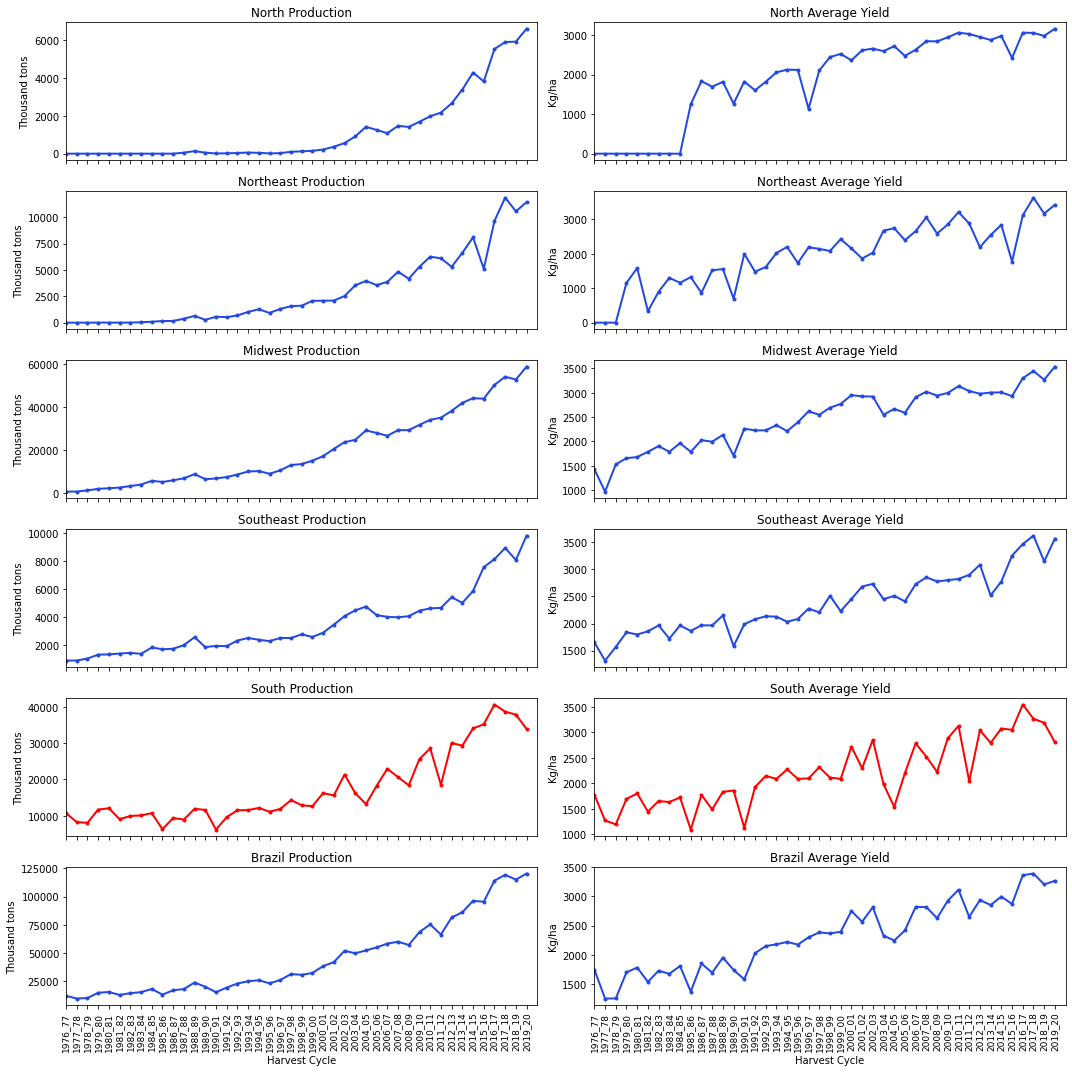

In [37]:
x_ax = df_sp['Harvest_cycle']

sp_norte = df_sp['NORTE']
sp_nordeste = df_sp['NORDESTE']
sp_centro_oeste = df_sp['CENTRO-OESTE']
sp_sudeste = df_sp['SUDESTE']
sp_sul = df_sp['SUL']
sp_brasil = df_sp['BRASIL']

sy_norte = df_sy['NORTE']
sy_nordeste = df_sy['NORDESTE']
sy_centro_oeste = df_sy['CENTRO-OESTE']
sy_sudeste = df_sy['SUDESTE']
sy_sul = df_sy['SUL']
sy_brasil = df_sy['BRASIL']

fig, axs = plt.subplots(6, 2, figsize=(15, 15),sharex=True) #Set the figure with 6 rows and 2 columns of chart
# The firts number inside [] set the index and the second number set the column
# Thus the [0,0] menans that it is the first chart of the first column. [1,0] is the second chart of the first column and so on.

axs[0,0].plot(x_ax, sp_norte, color='#2349E1', lw=2, marker='.') 
axs[0,0].set_title('North Production')
axs[0,0].set_ylabel('Thousand tons')

axs[1,0].plot(x_ax, sp_nordeste, color='#2349E1', lw=2, marker='.')
axs[1,0].set_title('Northeast Production')
axs[1,0].set_ylabel('Thousand tons')

axs[2,0].plot(x_ax, sp_centro_oeste, color='#2349E1', lw=2, marker='.')
axs[2,0].set_title('Midwest Production')
axs[2,0].set_ylabel('Thousand tons')

axs[3,0].plot(x_ax, sp_sudeste, color='#2349E1', lw=2, marker='.')
axs[3,0].set_title('Southeast Production')
axs[3,0].set_ylabel('Thousand tons')

axs[4,0].plot(x_ax, sp_sul, color='red', lw=2, marker='.')
axs[4,0].set_title('South Production')
axs[4,0].set_ylabel('Thousand tons')

axs[5,0].plot(x_ax, sp_brasil, color='#2349E1', lw=2, marker='.')
axs[5,0].set_title('Brazil Production')
axs[5,0].set_xticklabels(x_ax, rotation=90, fontsize=9)
axs[5,0].set_xlim(xmin=0, xmax=44)
axs[5,0].set_ylabel('Thousand tons')
axs[5,0].set_xlabel('Harvest Cycle')

axs[0,1].plot(x_ax, sy_norte, color='#2349E1', lw=2, marker='.')
axs[0,1].set_title('North Average Yield')
axs[0,1].set_ylabel('Kg/ha')

axs[1,1].plot(x_ax, sy_nordeste, color='#2349E1', lw=2, marker='.')
axs[1,1].set_title('Northeast Average Yield')
axs[1,1].set_ylabel('Kg/ha')

axs[2,1].plot(x_ax, sy_centro_oeste, color='#2349E1', lw=2, marker='.')
axs[2,1].set_title('Midwest Average Yield')
axs[2,1].set_ylabel('Kg/ha')

axs[3,1].plot(x_ax, sy_sudeste, color='#2349E1', lw=2, marker='.')
axs[3,1].set_title('Southeast Average Yield')
axs[3,1].set_ylabel('Kg/ha')

axs[4,1].plot(x_ax, sy_sul, color='red', lw=2, marker='.')
axs[4,1].set_title('South Average Yield')
axs[4,1].set_ylabel('Kg/ha')

axs[5,1].plot(x_ax, sy_brasil, color='#2349E1', lw=2, marker='.')
axs[5,1].set_title('Brazil Average Yield')
axs[5,1].set_xticklabels(x_ax, rotation=90, fontsize=9)
axs[5,1].set_xlim(xmin=0, xmax=44)
axs[5,1].set_ylabel('Kg/ha')
axs[5,1].set_xlabel('Harvest Cycle')

plt.tight_layout()
#fig.savefig('figure2.jpeg', dpi=300)

##Result 
As we can see, the South region (red line) presents the highest number of crop shortfalls and also a highly variable Average Yield. Therefore, the next step is to analyze the data of states of the South region.

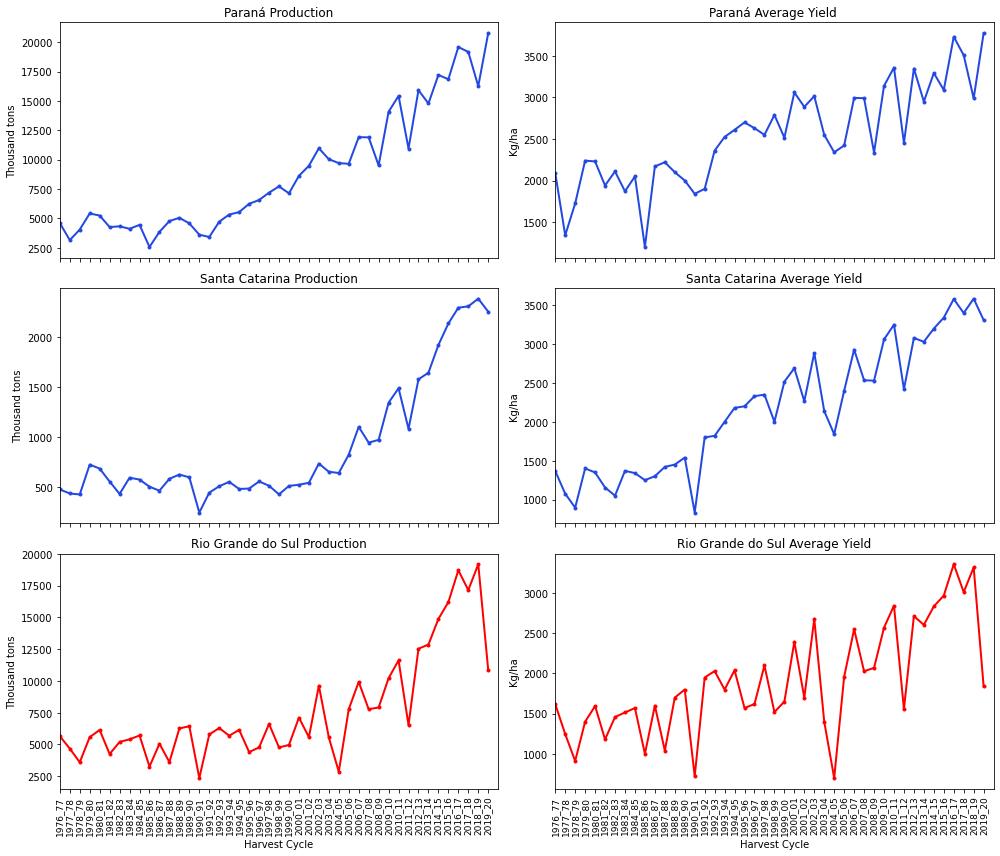

In [38]:
x_s = df_sp['Harvest_cycle']
pr_sp = df_sp['PR']
sc_sp = df_sp['SC']
rs_sp = df_sp['RS']

pr_sy = df_sy['PR']
sc_sy = df_sy['SC']
rs_sy = df_sy['RS']

fig, axs = plt.subplots(3, 2, figsize=(14, 12),sharex=True)

axs[0,0].plot(x_s, pr_sp, color='#2349E1', lw=2, marker='.')
axs[0,0].set_title('Paraná Production')
axs[0,0].set_ylabel('Thousand tons')

axs[1,0].plot(x_s, sc_sp, color='#2349E1', lw=2, marker='.')
axs[1,0].set_title('Santa Catarina Production')
axs[1,0].set_ylabel('Thousand tons')

axs[2,0].plot(x_s, rs_sp, color='red', lw=2, marker='.')
axs[2,0].set_title('Rio Grande do Sul Production')
axs[2,0].set_xticklabels(x_ax, rotation=90, fontsize=9)
axs[2,0].set_xlim(xmin=0, xmax=44)
axs[2,0].set_ylabel('Thousand tons')
axs[2,0].set_xlabel('Harvest Cycle')

axs[0,1].plot(x_s, pr_sy, color='#2349E1', lw=2, marker='.')
axs[0,1].set_title('Paraná Average Yield ')
axs[0,1].set_ylabel('Kg/ha')

axs[1,1].plot(x_s, sc_sy, color='#2349E1', lw=2, marker='.')
axs[1,1].set_title('Santa Catarina Average Yield')
axs[1,1].set_ylabel('Kg/ha')

axs[2,1].plot(x_s, rs_sy, color='red', lw=2, marker='.')
axs[2,1].set_title('Rio Grande do Sul Average Yield')
axs[2,1].set_xticklabels(x_ax, rotation=90, fontsize=9)
axs[2,1].set_xlim(xmin=0, xmax=44)
axs[2,1].set_ylabel('Kg/ha')
axs[2,1].set_xlabel('Harvest Cycle')

plt.tight_layout()
fig.savefig('figure3.jpeg', dpi=300)

###Result 
All satates of South region shows numerous decrease of Soybean production. However, Rio Grande do Sul display huge number of crop shortfalls. The harvest cycle 1991/1992 registred a decrease of 63% compared to the previous cycle. Other two drastic drops were registred in sequence. In 2003/2004 the production decreased 42,27% comparing to 2002/2003 followed by a second fall in 2004/2005 48,64% lower than 2003/2004. Comparing with 2002/2003 cycle, the last gain of productivitiy, the achieve the number of 70,35%. 

After 6 harvest cycles without a drastic reduction of production, the 2011/2012 havest presented and drop of 43,86% comparing with 2010/2011. The last critical loss of productivity occured in 2019/2020. After the production record, the Rio Grande do Sul registred a reduction of 43,4%. 

After analyzing the data is clear that, historically, the Rio Grande do Sul state presents a very unstable production. Therefore, the next step is to compare those falls with the El Niño and La Niña occurrence.

## Analysis of El Niño and La Ninã occurance and Rio Grande do Sul Soybean Production 

To evaluate the relation of El Niño occurrence and the drastic decrease in the Rio Grande do Sul Soybean, both data frame will be compared. However, the El Niño (df_oni) data frame initiate in 1950, and the soybean production (df_sp), and all derivative data and lists, in 1976/1977. Therefore, the ONI data frame will be adjusted according to soybean production dataframe. The adjustment follow the step below.
 
 * Use the method `df.loc` and select all values equal or higher than 1977 in the **Year** column of **df_oni**.
 
 The new data frame is named as df_selected

In [39]:
#Select the data
df_selected = df_oni.loc[(df_oni.Year >= 1977)]

In [40]:
#Check the result
df_selected.head(3)

Oni_index  Year Periods Year_period
Year                                         
1977 DJF        0.7  1977     DJF    1977_DJF
     JFM        0.6  1977     JFM    1977_JFM
     FMA        0.3  1977     FMA    1977_FMA

#Comparing the data
Once both data frames present the same time interval, now they are comparable. The crop shortfalls are highlighted by black circles in both charts. The Rio Grande do Sul Production chart, present red circles indicating the highest falls of soybean production. 

The effects of El Niño and La Niña are not instantaneous, it takes time to affect the continent clime. Therefore, the analysis focus on what happened just before some crop shortfall. Those events are signalized by gray areas on ONI chart. The analysis initiate from the first drastic fall, registered in 1990/1991.

The comparison is performed using the `subplot` method. 

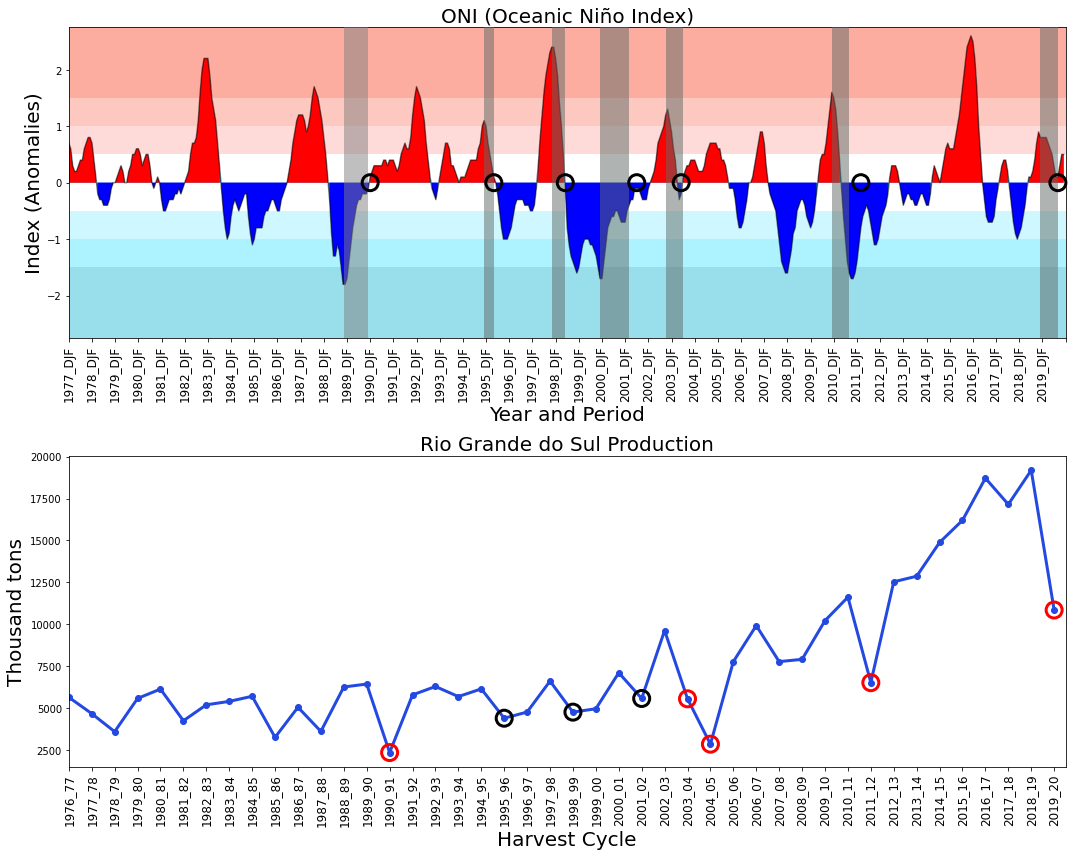

In [46]:
x = df_selected['Year_period']
y = df_selected['Oni_index']

x2 = df_sp['Harvest_cycle']
rs_sp = df_sp['RS']
rs_sy = df_sy['RS']

loc = plticker.MultipleLocator(base=12)


bbox_props = dict(boxstyle="circle", fc='none', ec='black', lw=3) #circles style

bbox_props_r = dict(boxstyle="circle", fc='none', ec='red', lw=3) #circles style


fig, ((ax1), (ax2)) = plt.subplots(2,1,figsize=(15,12))


ax1.plot(x, y, color='black', alpha=0.5)
ax1.fill_between(x, 0, y)
ax1.fill_between(x, y, where= y >= 0, facecolor='red', zorder=2)
ax1.fill_between(x, y, where= y <= 0, facecolor='blue', zorder=2)
ax1.xaxis.set_major_locator(loc)
ax1.set_xlim(xmin=0, xmax=516)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=90, fontsize=12 )
ax1.set_ylim(ymin=-2.75, ymax=2.75)

ax1.text(156, 0, s=' ', ha="center", va='center', size=10, bbox=bbox_props)
ax1.axvspan(142.5, 155, facecolor='grey', alpha=0.5, zorder=3)
ax1.text(220, 0, s=' ', ha="center", va='center', size=10, bbox=bbox_props)
ax1.axvspan(215, 220, facecolor='#606B66', alpha=0.5, zorder=3)
ax1.text(257, 0, s=' ', ha="center", va='center', size=10, bbox=bbox_props)
ax1.axvspan(250, 257, facecolor='#606B66', alpha=0.5, zorder=3)
ax1.text(294, 0, s=' ', ha="center", va='center', size=10, bbox=bbox_props)
ax1.axvspan(275, 290, facecolor='#606B66', alpha=0.5, zorder=3)
ax1.text(317, 0, s=' ', ha="center", va='center', size=10, bbox=bbox_props)
ax1.axvspan(309, 318, facecolor='#606B66', alpha=0.5, zorder=3)
ax1.text(410, 0, s=' ', ha="center", va='center', size=10, bbox=bbox_props)
ax1.axvspan(395, 404, facecolor='#606B66', alpha=0.5, zorder=3)
ax1.text(512, 0, s=' ', ha="center", va='center', size=10, bbox=bbox_props)
ax1.axvspan(503, 512, facecolor='#606B66', alpha=0.5, zorder=3)

ax1.axhspan(1.5,2.75, facecolor='#F83310', alpha=0.4)
ax1.axhspan(1, 1.5, facecolor='#FB765F', alpha=0.4)
ax1.axhspan(0.5, 1, facecolor='#FDA7A0', alpha=0.4)
ax1.axhspan(0, 0, facecolor='#FFFFFF', alpha=0.4)
ax1.axhspan(-0.5, -1, facecolor='#89EDFF', alpha=0.4)
ax1.axhspan(-1, -1.5, facecolor='#32E0FF', alpha=0.4)
ax1.axhspan(-1.5,-2.75, facecolor='#02B0CF', alpha=0.4)
ax1.set_xlabel('Year and Period', size=20)
ax1.set_ylabel('Index (Anomalies)', size=20)
ax1.set_title('ONI (Oceanic Niño Index)', size=20)

ax2.plot(x2, rs_sp, color='#2349E1', lw=3, marker='o')
ax2.set_title('Rio Grande do Sul Production', fontsize=20)
ax2.set_ylabel('Thousand tons', fontsize=20)
ax2.set_xlim(xmin=0, xmax=43.5)
ax2.set_xlabel('Harvest Cycle', fontsize=20)
ax2.set_xticklabels(x2, rotation=90, fontsize=12)
ax2.text(14, 2354, s=' ', ha="center", va='center', size=10, bbox=bbox_props_r)
ax2.text(19, 4402, s=' ', ha="center", va='center', size=10, bbox=bbox_props)
ax2.text(22, 4764, s=' ', ha="center", va='center', size=10, bbox=bbox_props)
ax2.text(25, 5578, s=' ', ha="center", va='center', size=10, bbox=bbox_props)
ax2.text(27, 5559, s=' ', ha="center", va='center', size=10, bbox=bbox_props_r)
ax2.text(28, 2854, s=' ', ha="center", va='center', size=10, bbox=bbox_props_r)
ax2.text(35, 6520, s=' ', ha="center", va='center', size=10, bbox=bbox_props_r)
ax2.text(43, 10853, s=' ', ha="center", va='center', size=10, bbox=bbox_props_r)

plt.tight_layout()
#fig.savefig('figure4.jpeg', dpi=300)

## Results 
As we can see, all the crop shortfalls occurred after a sudden change of sea temperature. The the 1990/1991 and 2001/2002 falls, occurred during the transition from La Niña to El Niño. The others crop shortfall occurred during the transition from El Niño to La Niña, or at least to the neutral zone as 2003/2004 and 2019/2020. 

Lets take a look at the how abrut were the ONI changing before the highest production falls. 

This analysis is executed following the steps below.

* use the `df.loc` method and the conditional parameter **>=** and **<=** to select the interval.  

In [42]:
#Select the interval 
df_1 = df_oni.loc[(df_oni.Year >= 1989) & (df_oni.Year < 1991)]
df_2 = df_oni.loc[(df_oni.Year >= 2002) & (df_oni.Year <= 2004)]
df_3 = df_oni.loc[(df_oni.Year >= 2010) & (df_oni.Year < 2012)]
df_4 = df_oni.loc[(df_oni.Year >= 2019) & (df_oni.Year < 2020)]; 

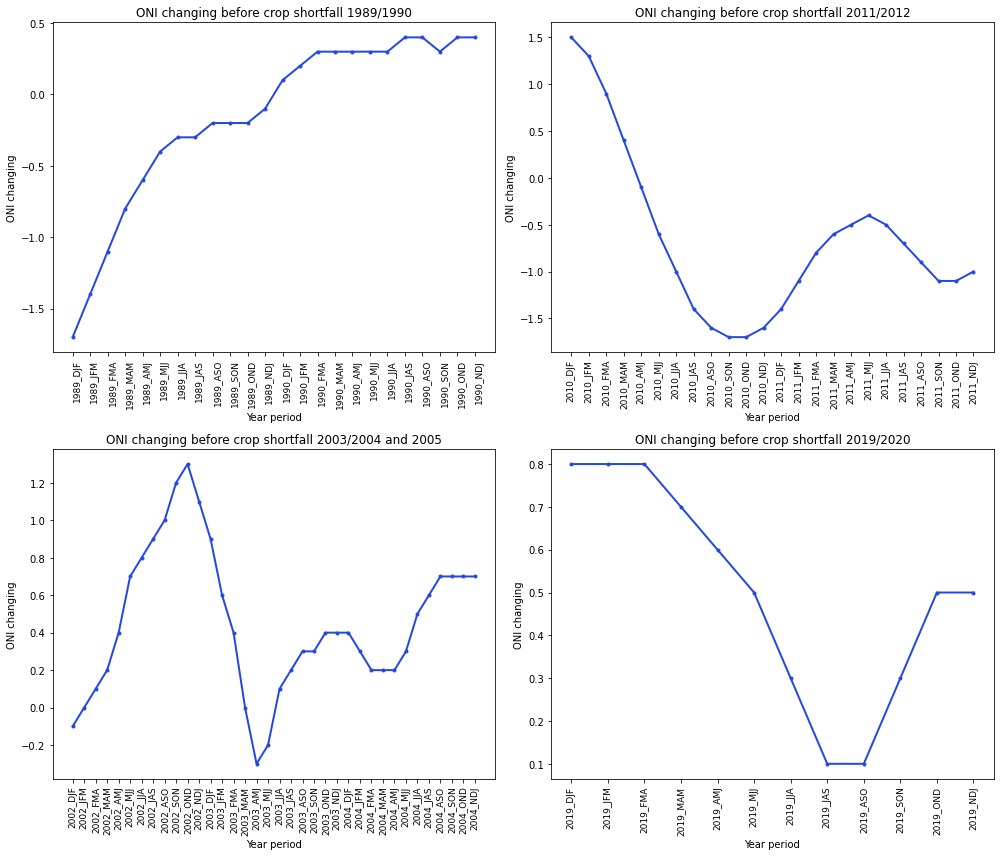

In [43]:
#Plot the data

fig, axs = plt.subplots(2, 2, figsize=(14, 12))


axs[0,0].plot(df_1.Year_period, df_1.Oni_index, color='#2349E1', lw=2, marker='.')
axs[0,0].set_title('ONI changing before crop shortfall 1989/1990')
axs[0,0].set_xticklabels(df_1.Year_period, rotation=90, fontsize=9, ha='left')
axs[0,0].set_ylabel('ONI changing')
axs[0,0].set_xlabel('Year period')

axs[1,0].plot(df_2.Year_period, df_2.Oni_index, color='#2349E1', lw=2, marker='.')
axs[1,0].set_title('ONI changing before crop shortfall 2003/2004 and 2005')
axs[1,0].set_xticklabels(df_2.Year_period, rotation=90, fontsize=9)
axs[1,0].set_ylabel('ONI changing')
axs[1,0].set_xlabel('Year period')


axs[0,1].plot(df_3.Year_period, df_3.Oni_index, color='#2349E1', lw=2, marker='.')
axs[0,1].set_title('ONI changing before crop shortfall 2011/2012')
axs[0,1].set_xticklabels(df_3.Year_period, rotation=90, fontsize=9)
axs[0,1].set_ylabel('ONI changing')
axs[0,1].set_xlabel('Year period')

axs[1,1].plot(df_4.Year_period, df_4.Oni_index, color='#2349E1', lw=2, marker='.')
axs[1,1].set_title('ONI changing before crop shortfall 2019/2020')
axs[1,1].set_xticklabels(df_4.Year_period, rotation=90, fontsize=9)
axs[1,1].set_ylabel('ONI changing')
axs[1,1].set_xlabel('Year period')

plt.tight_layout()
#fig.savefig('figure5.jpeg', dpi=300)

#Result 
At during the 1989 and 1990 harvest cycle the sea tempeature changed from strong La Niña to neutral and during the 1990 it remained as neutral El Niño. Two completely different climate situation. 

The producion break in 2003/2004 was preceded by an transition from neutral La Niña to moderate El Niño that took 11 months to occur. However, in 2003 the temperature falls more the 1.2° C in 6 months and than keepet at the El Niño neutral zone until turn into weak El Niño in 2004. Thus, in 16 months the temperature presented an abrupt variation, and Rio Grande do Sul soybean production two consecutive crop shortfall.   

The 2011/2012 harvest cycle came after an intense ONI variaton. In 2010 occured a strong El Niño and eight months later a strong La Niña, changing to neutral La Niña 6 months later in 2011. In the middle of 2011 the neutral La Niña chenged to moderate La Niña in 4 months.

The last reduction in soybean production occurred in 2019. The ONI changing took place less intense than other events, but still, the soybean production presented a dramatic decrease.

#**Conclusion**

The influence of El Niño in world climate is well known, in a country with continental extensions, like Brazil, different places might present distinct susceptibility to the ONI variations. The Rio Grande do Sul presented the most unstable soybean production among all states of Brazil. The production volatility of the Rio Grande do Sul seems to be closely related to the Oceanic El Niño Index changing. The localization of Rio Grande do Sul at the south of South American continent might contribute. Other states are under the influence of others atmospheric as Atlantic temperature changing, Convergence Zones, or covered by Andes mountain range. 
Other atmospheric events might act together with El Niño, making the climate predictive analysis complex. Define patterns and apply powerful technologies like Artificial Intelligence, certainly helps scientists to predict possibles climate scenarios to avoid drastic impact on food production. 